In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss            #вообще здесь должны быть слова о перекрёстной энтропии, но у нас только введение
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import GradientBoostingClassifier as GBS 


file = pd.read_csv('gbm-data.csv')
df = pd.DataFrame(data = file)
target = df['Activity'].values
data = df.drop('Activity', axis =1).values
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.8, random_state = 241)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


      Iter       Train Loss   Remaining Time 
         1           1.0190           17.89s
         2           0.9192           14.94s
         3           0.8272           12.49s
         4           0.7834           10.81s
         5           0.7109           11.93s
         6           0.6368           11.78s
         7           0.5797           11.14s
         8           0.5610           10.66s
         9           0.5185           10.48s
        10           0.4984           10.15s
        20           0.1999            9.78s
        30           0.1313           10.20s
        40           0.0790            9.67s
        50           0.0511            8.90s
        60           0.0352            8.29s
        70           0.0245            7.69s
        80           0.0162            7.15s
        90           0.0114            6.63s
       100           0.0077            6.16s
       200           0.0004            1.91s
      Iter       Train Loss   Remaining Time 
        

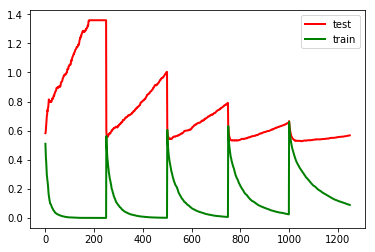

In [21]:
#Если просто запустить clf.predict(x_test), то получим только конечный результат y_pred. 
#А хотелось бы проанализировать процесс улучшения, получить 250 значений y_pred[1:250]. 
#Для этого вводится функция staged_decision_function() - "поэтапная решающая функция".

train_loss = [] # Списки, хранящие значения log_loss с ключом, равным номеру итерации
test_loss = []

learn_rate = [1, 0.5, 0.3, 0.2, 0.1]
for i in learn_rate:   
    
    gbs = GBS(n_estimators=250, verbose=True, random_state=241, learning_rate = i)
    gbs.fit(X_train,y_train)                                # Всё же сначала обучаем
                                                       # В Python enumerate рассматривается как функция. Смысл - как у С++
    for j, y_pred in enumerate(gbs.staged_decision_function(X_train)):  #  А затем заново строим поэтапное обучение
        y_pred = - y_pred
        y_pred = 1 / (1 + np.exp(y_pred)) 
        train_loss.append(log_loss(y_train,y_pred))
    for j, y_pred in enumerate(gbs.staged_decision_function(X_test)):  #  А затем заново строим поэтапное обучение
        y_pred = - y_pred
        y_pred = 1 / (1 + np.exp(y_pred)) 
        test_loss.append(log_loss(y_test,y_pred)) 
    %matplotlib inline
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test','train'])

In [26]:
split = test_loss[751:1000]
print(min(split),split.index(min(split)), sep =  ' ')

0.531094637596885 35


In [32]:
#На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта,
# c random_state=241 и остальными параметрами по умолчанию. 
# Какое значение log-loss на тесте получается у этого случайного леса? 
#  Не забывайте, что предсказания нужно получать с помощью функции predict_proba
from sklearn.ensemble import RandomForestClassifier

file = pd.read_csv('gbm-data.csv')
df = pd.DataFrame(data = file)
target = df['Activity'].values
data = df.drop('Activity', axis =1).values
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.8, random_state = 241)
forest = RandomForestClassifier(n_estimators=35, random_state = 241)
forest.fit(X_train,y_train)
y_pred = forest.predict_proba(X_test)
print(log_loss(y_test,y_pred)) # На выходе - ошибка


0.5214106540472289
